<a href="https://colab.research.google.com/github/B21-CAP0075/Dementia-Classification/blob/master/Dementia_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

import tensorflow as tf
from keras.models import load_model
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install --upgrade --force-reinstall --no-deps kaggle
! mkdir /root/.kaggle/
! cp "/content/drive/My Drive/Machine Learning/kaggle.json" /root/.kaggle/
! chmod 600 /root/.kaggle/kaggle.json

     |████████████████████████████████| 61kB 3.3MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.8-cp36-none-any.whl size=73275 sha256=aae82dd6fd931eedeca938ca27c8aef200f4a6ba32d605d312b32bed0bee3fe2
  Stored in directory: /root/.cache/pip/wheels/94/a7/09/68dc83c7c14fdbdf5d3f2b2da5b87e587bfc1e85df69b1130c
Successfully built kaggle
  Found existing installation: kaggle 1.5.8
    Uninstalling kaggle-1.5.8:
      Successfully uninstalled kaggle-1.5.8


In [ ]:
! kaggle datasets download -d jboysen/mri-and-alzheimers

  0% 0.00/12.6k [00:00<?, ?B/s]
100% 12.6k/12.6k [00:00<00:00, 10.6MB/s]


In [ ]:
zip_ref = zipfile.ZipFile('mri-and-alzheimers.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
df_cross = pd.read_csv('oasis_cross-sectional.csv')
df_cross

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
431,OAS1_0285_MR2,M,R,20,NaN,NaN,NaN,NaN,1469,0.847,1.195,2.0
432,OAS1_0353_MR2,M,R,22,NaN,NaN,NaN,NaN,1684,0.790,1.042,40.0
433,OAS1_0368_MR2,M,R,22,NaN,NaN,NaN,NaN,1580,0.856,1.111,89.0
434,OAS1_0379_MR2,F,R,20,NaN,NaN,NaN,NaN,1262,0.861,1.390,2.0


In [ ]:
df_long = pd.read_csv('oasis_longitudinal.csv')
df_long

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


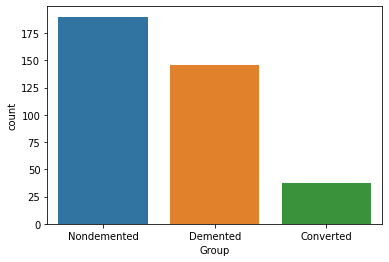

In [ ]:
sns.countplot(df_long['Group'])

In [ ]:
df_converted = df_long[df_long['Group']=='Converted']
df_converted.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
33,OAS2_0018,OAS2_0018_MR1,Converted,1,0,F,R,87,14,1.0,30.0,0.0,1406,0.715,1.248
34,OAS2_0018,OAS2_0018_MR3,Converted,3,489,F,R,88,14,1.0,29.0,0.0,1398,0.713,1.255
35,OAS2_0018,OAS2_0018_MR4,Converted,4,1933,F,R,92,14,1.0,27.0,0.5,1423,0.696,1.234
36,OAS2_0020,OAS2_0020_MR1,Converted,1,0,M,R,80,20,1.0,29.0,0.0,1587,0.693,1.106
37,OAS2_0020,OAS2_0020_MR2,Converted,2,756,M,R,82,20,1.0,28.0,0.5,1606,0.677,1.093


In [ ]:
df_long['Group'] = df_long['Group'].replace(['Converted'], 'Demented')
df_long

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


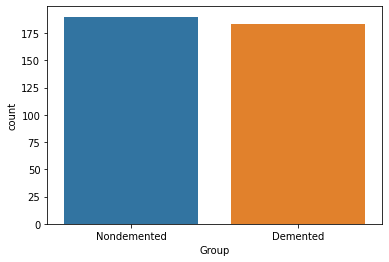

In [ ]:
sns.countplot(df_long['Group'])

In [ ]:
category = df_long['Group'].replace(['Demented', 'Nondemented'], [1, 0])
gender = pd.get_dummies(df_long['M/F'])

df = df_long.drop(columns=['Subject ID', 'MRI ID', 'Visit', 'MR Delay', 'Group', 'M/F', 'Hand','CDR', 'eTIV', 'nWBV', 'ASF'])
df = pd.concat([df, gender, category], axis=1)
df

,Age,EDUC,SES,MMSE,F,M,Group
0,87,14,2.0,27.0,0,1,0
1,88,14,2.0,30.0,0,1,0
2,75,12,NaN,23.0,0,1,1
3,76,12,NaN,28.0,0,1,1
4,80,12,NaN,22.0,0,1,1
...,...,...,...,...,...,...,...
368,82,16,1.0,28.0,0,1,1
369,86,16,1.0,26.0,0,1,1
370,61,13,2.0,30.0,1,0,0
371,63,13,2.0,30.0,1,0,0


In [ ]:
df.isnull().sum()

Age       0
EDUC      0
SES      19
MMSE      2
F         0
M         0
Group     0
dtype: int64

In [ ]:
df_null = df[df.isnull().any(axis=1)]
df_null

,Age,EDUC,SES,MMSE,F,M,Group
2,75,12,NaN,23.0,0,1,1
3,76,12,NaN,28.0,0,1,1
4,80,12,NaN,22.0,0,1,1
10,71,16,NaN,28.0,0,1,1
11,73,16,NaN,27.0,0,1,1
12,75,16,NaN,27.0,0,1,1
134,80,12,NaN,30.0,1,0,1
135,81,12,NaN,27.0,1,0,1
207,80,12,NaN,27.0,1,0,1
208,83,12,NaN,23.0,1,0,1


In [ ]:
df_demented = df[df['Group'] == 1]
df_demented.head()

,Age,EDUC,SES,MMSE,F,M,Group
2,75,12,NaN,23.0,0,1,1
3,76,12,NaN,28.0,0,1,1
4,80,12,NaN,22.0,0,1,1
10,71,16,NaN,28.0,0,1,1
11,73,16,NaN,27.0,0,1,1


In [ ]:
mean_mmse_demented = df_demented['MMSE'].mean()
mean_ses_demented = df_demented['SES'].mean()
print(mean_mmse_demented)
print(mean_ses_demented)

25.364640883977902
2.5365853658536586


In [ ]:
df['MMSE'] = df['MMSE'].replace(df_null['MMSE'], round(mean_mmse_demented))
df['SES'] = df['SES'].replace(df_null['SES'], round(mean_ses_demented))
df.isnull().sum()

Age      0
EDUC     0
SES      0
MMSE     0
F        0
M        0
Group    0
dtype: int64

In [ ]:
df.loc[(df['MMSE'] >= 24) & (df['MMSE'] <= 30), 'Interpreted'] = "Normal"
df.loc[(df['MMSE'] >= 19) & (df['MMSE'] <= 23), 'Interpreted'] = "Mild"
df.loc[(df['MMSE'] >= 10) & (df['MMSE'] <= 18), 'Interpreted'] = "Moderate"
df.loc[(df['MMSE'] >= 0) & (df['MMSE'] <= 9), 'Interpreted'] = "Severe"
df

,Age,EDUC,SES,MMSE,F,M,Group,Interpreted
0,87,14,2.0,27.0,0,1,0,Normal
1,88,14,2.0,30.0,0,1,0,Normal
2,75,12,3.0,25.0,0,1,1,Normal
3,76,12,3.0,25.0,0,1,1,Normal
4,80,12,3.0,25.0,0,1,1,Normal
...,...,...,...,...,...,...,...,...
368,82,16,1.0,28.0,0,1,1,Normal
369,86,16,1.0,26.0,0,1,1,Normal
370,61,13,2.0,30.0,1,0,0,Normal
371,63,13,2.0,30.0,1,0,0,Normal


In [ ]:
interpreted = pd.get_dummies(df['Interpreted'])

df_inter = df.drop(columns=['Interpreted'])
df_inter = pd.concat([df_inter, interpreted], axis=1)
df_inter

,Age,EDUC,SES,MMSE,F,M,Group,Mild,Moderate,Normal,Severe
0,87,14,2.0,27.0,0,1,0,0,0,1,0
1,88,14,2.0,30.0,0,1,0,0,0,1,0
2,75,12,3.0,25.0,0,1,1,0,0,1,0
3,76,12,3.0,25.0,0,1,1,0,0,1,0
4,80,12,3.0,25.0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
368,82,16,1.0,28.0,0,1,1,0,0,1,0
369,86,16,1.0,26.0,0,1,1,0,0,1,0
370,61,13,2.0,30.0,1,0,0,0,0,1,0
371,63,13,2.0,30.0,1,0,0,0,0,1,0


In [ ]:
x = df_inter[['Age',	'M', 'F', 'EDUC', 'SES', 'MMSE', 'Severe', 'Moderate',	'Mild',	'Normal']].values # visit
y = df_inter[['Group']].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(298, 10)
(75, 10)


In [ ]:
scaler = StandardScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(8, activation='relu', input_shape=[10]),
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Dense(4, activation='relu'),
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Dense(1, activation='sigmoid')    
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
class StopTraining(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    accuracy = 0.76
    if(logs.get('accuracy') >= accuracy and logs.get('val_accuracy') >= accuracy):
      print('\nSudah mencapai akurasi {}%, proses training berhenti'.format(accuracy*100))
      self.model.stop_training = True

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)
es = EarlyStopping(monitor='val_loss', patience=100, baseline=0.7)
st = StopTraining()

In [ ]:
history = model.fit(x_train_scaled, y_train, epochs=1000, validation_data=(x_test_scaled, y_test), callbacks=[mc, es, st], verbose=2)

Epoch 1/1000
10/10 - 0s - loss: 0.8964 - accuracy: 0.5000 - val_loss: 0.8130 - val_accuracy: 0.4267
Epoch 2/1000
10/10 - 0s - loss: 0.8466 - accuracy: 0.5000 - val_loss: 0.7982 - val_accuracy: 0.4000
Epoch 3/1000
10/10 - 0s - loss: 0.8726 - accuracy: 0.5570 - val_loss: 0.7871 - val_accuracy: 0.4267
Epoch 4/1000
10/10 - 0s - loss: 0.8400 - accuracy: 0.5067 - val_loss: 0.7767 - val_accuracy: 0.4267
Epoch 5/1000
10/10 - 0s - loss: 0.8015 - accuracy: 0.5336 - val_loss: 0.7679 - val_accuracy: 0.4267
Epoch 6/1000
10/10 - 0s - loss: 0.8193 - accuracy: 0.4899 - val_loss: 0.7591 - val_accuracy: 0.4667
Epoch 7/1000
10/10 - 0s - loss: 0.7976 - accuracy: 0.4899 - val_loss: 0.7492 - val_accuracy: 0.5200
Epoch 8/1000
10/10 - 0s - loss: 0.8241 - accuracy: 0.4396 - val_loss: 0.7392 - val_accuracy: 0.4800
Epoch 9/1000
10/10 - 0s - loss: 0.7746 - accuracy: 0.5101 - val_loss: 0.7326 - val_accuracy: 0.4667
Epoch 10/1000
10/10 - 0s - loss: 0.7527 - accuracy: 0.5369 - val_loss: 0.7275 - val_accuracy: 0.4667

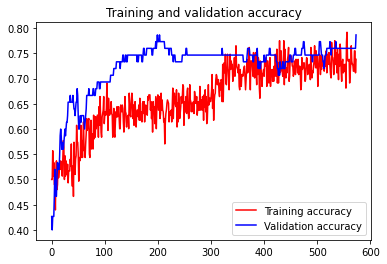

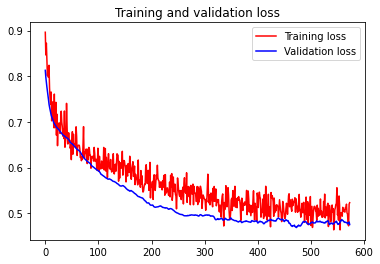

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)

plt.show()

In [ ]:
saved_model = load_model('best_model.h5')

loss, acc = saved_model.evaluate(x_test_scaled, y_test)
print("Accuracy: ", acc)

3/3 [==============================] - 0s 3ms/step - loss: 0.5179 - accuracy: 0.7867
Accuracy:  0.7866666913032532


In [ ]:
class EarlyStop(tf.keras.callbacks.Callback):
  def __init__(self, threshold=0.95, patience=3, significance_val=0.001):
    super(EarlyStop, self).__init__()

    self.threshold = threshold                                                    
    self.patience = patience                                                      
    self.significance_val = significance_val                                      
    self.best_weights = None                                                      
    self.is_reach_threshold = False                                               
    self.best_epoch = 0                                                           

  def on_train_begin(self, logs=None):
    self.previous_acc = 0                                                         
    self.wait = 0                                                                 

  def on_epoch_end(self, epoch, logs={}):
    self.current_acc = logs.get('val_accuracy')                                   

    if self.is_reach_threshold:
      if self.current_acc - self.previous_acc > self.significance_val:
        self.wait = 0
        self.previous_acc = self.current_acc
        self.best_weights = self.model.get_weights()
        self.best_epoch = epoch
        print('\n[INFO] Update weights terbaik!')
      else:
        self.wait += 1
        print(f'\n[INFO] Nilai patience sekarang = {self.wait}')
        if self.wait >= self.patience:
          self.model.stop_training = True
          print(f'\n[INFO] Validation Accuracy tidak bertambah setelah epochs ke-{self.patience}, sehingga training dihentikan.')
          self.model.set_weights(self.best_weights)
          print(f'\n[INFO] Mengembalikan nilai weights terbaik dari epoch ke-{self.best_epoch + 1} val_acc')
    
    if self.current_acc > self.threshold and not self.is_reach_threshold:
      self.is_reach_threshold = True
      self.previous_acc = self.current_acc
      self.best_weights = self.model.get_weights()
      self.best_epoch = epoch
      print('\n[INFO] Threshold tercapai! Nilai weights terbaik mulai dari sini.')